## **Mounting Drive for Database Access**

In [7]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **Importing necessary libraries and dataset for prediction**

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/ML/titanic_train.csv")
data_test = pd.read_csv("/content/drive/MyDrive/ML/titanic_test.csv")

## **Finding Null Values in each Feature**

In [9]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## **Handling Missing values and feature engineering**

In [10]:
# Handle missing values in 'Age' by filling with median
data['Age'].fillna(data['Age'].median(), inplace=True)

# 'Embarked' column has a few missing values, let's fill them with the most common value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column because it has too many missing values
data.drop(columns=['Cabin'], inplace=True)

# Drop any remaining rows with missing values
data.dropna(inplace=True)

#eature Engineering
#We need to convert categorical variables into numeric form, as Naive Bayes requires numerical data.

# Convert 'Sex' column to numeric (0 for female, 1 for male)
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

# Convert 'Embarked' column to numeric values
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop irrelevant columns (like 'Name', 'Ticket', 'PassengerId')
data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Display the cleaned dataset
data

<ipython-input-10-99dff302475b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-10-99dff302475b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0
887,1,1,0,19.0,0,0,30.0000,0
888,0,3,0,28.0,1,2,23.4500,0
889,1,1,1,26.0,0,0,30.0000,1


## **Segregation of independent and target variable**

In [11]:
# Features (X) and labels (y)
X = data.drop(columns='Survived')
y = data['Survived']

##**Splitting training and testing dataset**

In [12]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Training Logistic model**
(as training set features are not dependent on each other and have continous values)

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## **Predicting the values of target variable**

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)

#print(X_test[0:10])

#print(y_test[0:10])

#model.predict(X_test[0:10])

#model.predict_proba(X_test[0:10])


## **Evaluating the accuracy of model**

In [15]:
#Evaluate the Model
#Now, we’ll evaluate the model using accuracy and a confusion matrix to understand its performance.

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 79.89%


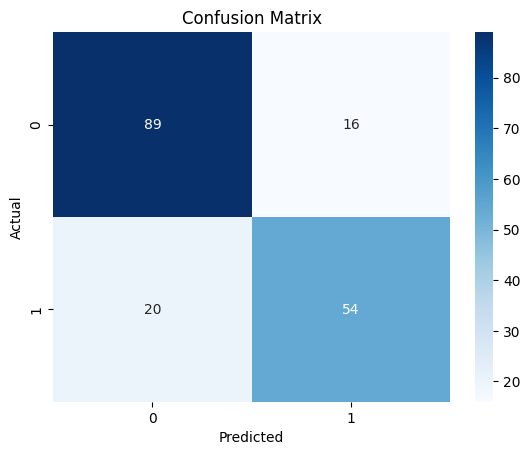

In [16]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()